This notebook contains several basic experiments which test out my implementation of the Delta and Perceptron rule on a simple dataset with binary labels, in particular comparing convergence properties of both algorithms.

In [1]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)

from ann.dataset import create_dataset, plot_dataset, plot_separator
from ann.delta_rule import *
from ann.perceptron import perceptron_train, perceptron_plot_convergence
from ann.plotting import figsize, savefig, subplots

# Create Dataset

Create a dataset made up of labeled samples from two distinct two dimensional gaussian distributions.

In [2]:
N = 100

LABEL_A = -1
LABEL_B = 1

MU_A = (2, 2.5)
SIGMA_A = 0.5

MU_B = (-1, 0)
SIGMA_B = 0.5

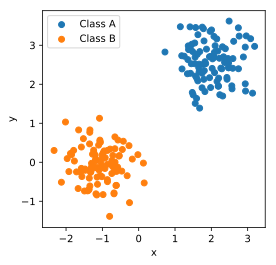

In [3]:
patterns, targets = create_dataset(
    N, [(MU_A, SIGMA_A), (MU_B, SIGMA_B)], [LABEL_A, LABEL_B])

plot_dataset(patterns, targets)

savefig('dataset.svg')

# Perceptron Implementation

Find a decision boundary using the Perceptron rule.

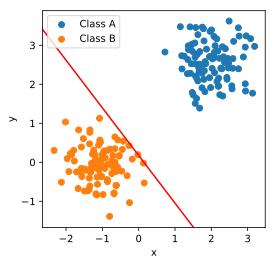

In [4]:
weights = perceptron_train(patterns, targets)

plot_separator(patterns, targets, [weights])

savefig('perceptron_sample.svg')

# Delta Rule Implementation

Find a decision boundary using the Delta rule.

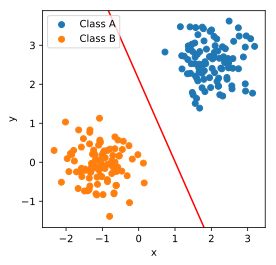

In [5]:
weights = delta_train(patterns, targets)

plot_separator(patterns, targets, [weights])

savefig('delta_rule_sample.svg')

# Perceptron Convergence

Visualize how many iterations it takes for the perceptron rule to converge for different dataset realizations, starting from zero weights.

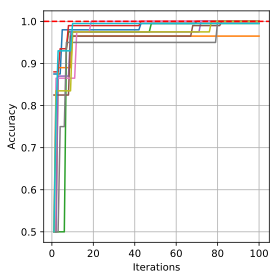

In [6]:
perceptron_plot_convergence(
    dataset_creator=lambda: create_dataset(N, [(MU_A, SIGMA_A), (MU_B, SIGMA_B)], [LABEL_A, LABEL_B]),
    iterations=range(1, 101),
    runs=10)

plt.tight_layout()

savefig('perceptron_convergence.svg')

# Delta Rule Convergence

Create Delta rule learning curves for different learning rates (with batch updates).

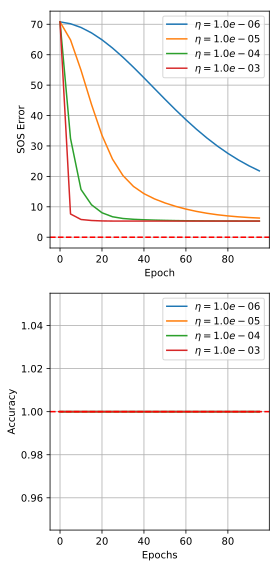

In [7]:
_, axes = subplots(2, 1, size=figsize(2, 1))

delta_plot_convergence(patterns,
                       targets,
                       learning_rates=np.logspace(-6, -3, 4),
                       epochs=np.arange(0, 100, 5),
                       batch=True,
                       axes=axes)

plt.tight_layout()

savefig('delta_rule_batch_convergence.svg')

Create Delta rule learning curves for different learning rates (with sequential updates).

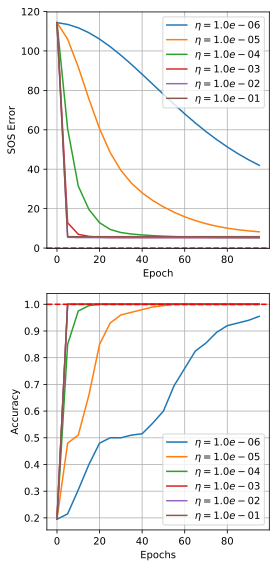

In [8]:
_, axes = subplots(2, 1)

delta_plot_convergence(patterns,
                       targets,
                       learning_rates=np.logspace(-6, -1, 6),
                       epochs=np.arange(0, 100, 5),
                       batch=False,
                       axes=axes)

plt.tight_layout()

savefig('delta_rule_sequential_convergence.svg')

Find average number of iterations until convergence.

In [9]:
delta_compare_convergence_speed(patterns,
                                targets,
                                learning_rates=np.logspace(-6, -1, 6),
                                runs=10)

eta = 1e-06: batch learning converged after 1.1e+03 +/- 1.3e+03 epochs
eta = 1e-06: sequential learning converged after 1.1e+03 +/- 1.3e+03 epochs
eta = 1e-05: batch learning converged after 9.2e+01 +/- 8.9e+01 epochs
eta = 1e-05: sequential learning converged after 9.2e+01 +/- 8.9e+01 epochs
eta = 0.0001: batch learning converged after 1.9e+01 +/- 9.2 epochs
eta = 0.0001: sequential learning converged after 1.9e+01 +/- 9.3 epochs
eta = 0.001: batch learning converged after 3.3 +/- 0.46 epochs
eta = 0.001: sequential learning converged after 3.1 +/- 0.83 epochs
eta = 0.01: sequential learning converged after 2.0 +/- 0.0 epochs
eta = 0.1: sequential learning converged after 2.0 +/- 0.0 epochs


# Delta Rule Sensitivity to Weight Initialization

Create historgrams of iterations until convergence for different Delta rule learning rates and random weight initializations.

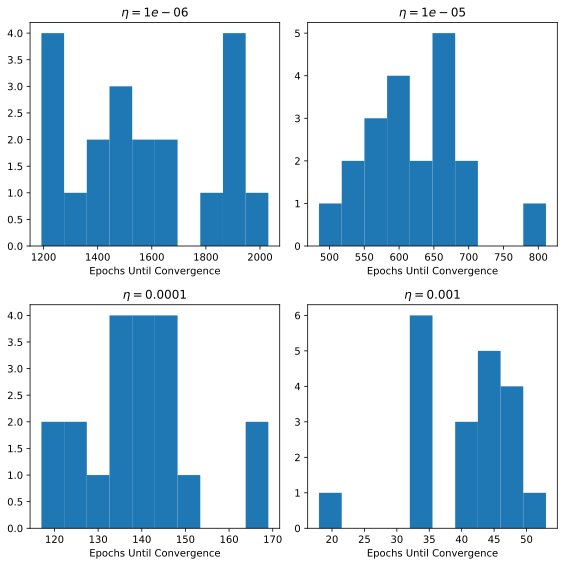

In [10]:
delta_plot_weight_sensitivity(patterns,
                              targets,
                              learning_rates=np.logspace(-6, -3, 4),
                              eps_convergence=0.01,
                              runs=20,
                              batch=True)

plt.tight_layout()

savefig('delta_rule_weight_sensitivity.svg')

# Convergence without Bias

In [11]:
patterns1, targets1 = create_dataset(N, [((0, 0), 0.5), ((3, 3), 0.5)], [LABEL_A, LABEL_B])
patterns1_no_bias = patterns1[:-1, :]

patterns2_no_bias = patterns1_no_bias - 1.5
targets2 = targets1

In [12]:
def plot_cross(ax):
    ax.axhline(0, color='k', linestyle='--')
    ax.axvline(0, color='k', linestyle='--')

## Perceptron

Compare resulting Perceptron rule decision boundary with and without bias term.

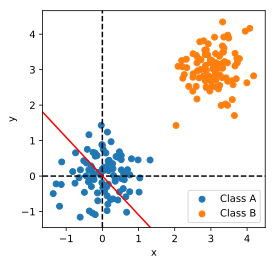

In [13]:
weights1 = perceptron_train(patterns1_no_bias, targets1, iterations=1000)

_, ax = subplots(1, 1)

plot_cross(ax)

plot_separator(patterns1_no_bias, targets1, [weights1], bias=False, ax=ax)

savefig('percepton_no_bias1.svg')

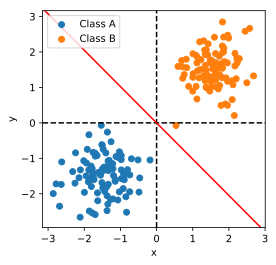

In [14]:
weights2 = perceptron_train(patterns2_no_bias, targets2)

_, ax = subplots(1, 1)

plot_cross(ax)

plot_separator(patterns2_no_bias, targets2, [weights2], bias=False, ax=ax)

savefig('percepton_no_bias2.svg')

## Delta Rule

Compare resulting Delta rule decision boundary with and without bias term.

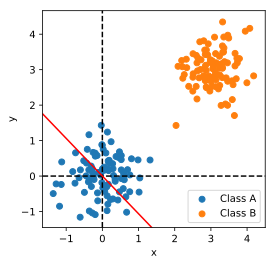

In [15]:
weights1 = delta_train(patterns1_no_bias, targets1)

_, ax = subplots(1, 1)

plot_cross(ax)

plot_separator(patterns1_no_bias, targets1, [weights1], bias=False, ax=ax)

savefig('delta_rule_no_bias1.svg')

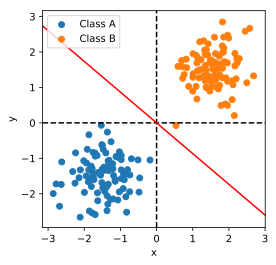

In [16]:
weights2 = delta_train(patterns2_no_bias, targets2)

_, ax = subplots(1, 1)

plot_cross(ax)

plot_separator(patterns2_no_bias, targets2, [weights2], bias=False, ax=ax)

savefig('delta_rule_no_bias2.svg')